# **Import Libraries**

In [ ]:
!pip install tf-keras==2.18.0 mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import tensorflow as tf
import tf_keras as keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from zipfile import ZipFile
import os
import time

E0000 00:00:1751464856.627219      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230


In [ ]:
if len(tf.config.list_logical_devices('TPU')) > 0 :
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='local')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(tf.config.list_logical_devices('GPU')) > 0 :
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
else :
    pass

I0000 00:00:1751464877.018027      10 service.cc:148] XLA service 0x55afc3a62fa0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751464877.018067      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1751464877.018071      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1751464877.018074      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1751464877.018077      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1751464877.018080      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1751464877.018083      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1751464877.018085      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1751464877.018099      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [ ]:
BATCH_SIZE = 16
BUFFER_SIZE = 1000
IMAGE_SIZE = (256, 192)

# **Import Data**

In [ ]:
train_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth',
                                                            labels=None,
                                                            image_size=IMAGE_SIZE,
                                                            batch_size=None,
                                                            shuffle=False,
                                                            subset='training',
                                                            validation_split=0.12
                                                           ).map(lambda x: x / 255)
val_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='validation',
                                                          validation_split=0.12
                                                         ).map(lambda x: x / 255)
test_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth',
                                                           labels=None,
                                                           image_size=IMAGE_SIZE,
                                                           batch_size=None,
                                                           shuffle=False,
                                                          ).map(lambda x: x / 255)

train_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth-mask',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='training',
                                                                 validation_split=0.12
                                                                )
val_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False,subset='validation',
                                                               validation_split=0.12
                                                              )
test_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth-mask',
                                                                labels=None,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=None,
                                                                shuffle=False
                                                               )

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.
Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


# **Data Preprocessing**

In [ ]:
def threshold_clothes_mask(image) :
    image = tf.reduce_mean(image, axis=-1)
    mask = tf.where(image > 127, 1.0, 0.0)
    mask = tf.expand_dims(mask, axis=-1)
    return mask

In [ ]:
train_clothes_mask = train_clothes_mask.map(threshold_clothes_mask)
val_clothes_mask = val_clothes_mask.map(threshold_clothes_mask)
test_clothes_mask = test_clothes_mask.map(threshold_clothes_mask)

In [ ]:
train_clothes_pairs = tf.data.Dataset.zip(train_clothes, train_clothes_mask).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)
val_clothes_pairs = tf.data.Dataset.zip(val_clothes, val_clothes_mask).cache().batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)
test_clothes_pairs = tf.data.Dataset.zip(test_clothes, test_clothes_mask).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# **Modelling**

In [ ]:
def UNet(input_shape,
         inputs=None,
         initial_filter=64,
         min_latent_dim=4,
         output_channel=3,
         output_activation='relu',
         encoder_conv_num=1,
         bottleneck_conv_num=3,
         bottleneck_filter_num=512,
         decoder_conv_num=1,
         use_upsample=True,
         use_pooling=True,
         use_instance_norm=False,
         use_leaky_relu=False,
         show_summary=True,
         model_name="attention_unet"
        ) :
    block_outputs = []
    block_filters = []
    min_dim = min(input_shape[:2])

    if inputs is None :
        input_layer = keras.Input(shape=input_shape)
    else :
        input_layer = keras.layers.Concatenate(name='concat_inputs')(inputs)

    # Encoder
    counter = 0
    factor = 1
    prev_layer = input_layer

    while min_dim >= min_latent_dim :
        if len(block_outputs) > 0 :
            if use_pooling :
                downsample = keras.layers.MaxPooling2D(pool_size=(2,2))(block_outputs[-1])
            else :
                downsample = keras.layers.Conv2D(filters=initial_filter*factor,
                                                 kernel_size=(3, 3),
                                                 strides=2,
                                                 padding='same')(block_outputs[-1])
            prev_layer = downsample

        if counter == 2 :
            factor *= 2
            counter = 0

        for i in range(encoder_conv_num) :
            conv = keras.layers.Conv2D(filters=initial_filter*factor,
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = keras.layers.BatchNormalization()(conv)
            else :
                norm = keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = keras.layers.ReLU()(norm)
            else :
                relu = keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        block_outputs.append(relu)
        block_filters.append(initial_filter*factor)

        counter += 1
        if min_dim % 2 == 0 :
            min_dim /= 2
        else :
            break

    # Bottleneck
    for _ in range(bottleneck_conv_num) :

        conv = keras.layers.Conv2D(filters=bottleneck_filter_num,
                                   kernel_size=(3, 3),
                                   padding='same')(prev_layer)
        if not use_instance_norm :
            norm = keras.layers.BatchNormalization()(conv)
        else :
            norm = keras.layers.GroupNormalization(groups=-1)(conv)

        if not use_leaky_relu :
            relu = keras.layers.ReLU()(norm)
        else :
            relu = keras.layers.LeakyReLU()(norm)
        prev_layer = relu

    # Decoder
    output_idx = len(block_outputs) - 1
    counter = 0
    if factor > 1 :
        factor /= 2

    while output_idx > 0 :
        if not use_upsample :
            upsize_layer = keras.layers.Conv2DTranspose(filters=block_filters[output_idx-1],
                                                        kernel_size=(2, 2),
                                                        strides=2)(prev_layer)
        else :
            upsize_layer = keras.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(prev_layer)

        if not use_instance_norm :
            norm = keras.layers.BatchNormalization()(upsize_layer)
        else :
            norm = keras.layers.GroupNormalization(groups=-1)(upsize_layer)

        if not use_leaky_relu :
            relu = keras.layers.ReLU()(norm)
        else :
            relu = keras.layers.LeakyReLU()(norm)

        # Attention block
        conv_w_encoder = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(block_outputs[output_idx-1])
        if not use_instance_norm :
            norm_w_encoder = keras.layers.BatchNormalization()(conv_w_encoder)
        else :
            norm_w_encoder = keras.layers.GroupNormalization(groups=-1)(conv_w_encoder)

        conv_w_decoder = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(relu)

        if not use_instance_norm :
            norm_w_decoder = keras.layers.BatchNormalization()(conv_w_decoder)
        else :
            norm_w_decoder = keras.layers.GroupNormalization(groups=-1)(conv_w_decoder)

        w_add = keras.layers.Add()([norm_w_encoder, norm_w_decoder])

        if not use_leaky_relu :
            w_relu = keras.layers.ReLU()(w_add)
        else :
            w_relu = keras.layers.LeakyReLU()(w_add)

        w_output = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(1, 1),
                                       padding='same',
                                       activation='sigmoid')(w_relu)
        att_output = keras.layers.Multiply()([w_output, block_outputs[output_idx-1]])

        # Concatenate
        concat = keras.layers.Concatenate()([relu, att_output])
        prev_layer = concat

        for _ in range(decoder_conv_num) :
            conv = keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = keras.layers.BatchNormalization()(conv)
            else :
                norm = keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = keras.layers.ReLU()(norm)
            else :
                relu = keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        output_idx -= 1

    output = keras.layers.Conv2D(filters=output_channel,
                                 kernel_size=(1, 1),
                                 activation=output_activation,
                                 padding='same')(prev_layer)

    if inputs is None :
        model = keras.Model(inputs=input_layer, outputs=output, name=model_name)
    else :
        model = keras.Model(inputs=inputs, outputs=output, name=model_name)

    if show_summary :
        model.summary()

    return model

In [ ]:
with strategy.scope() :
    clothes_input = keras.Input(shape=(*IMAGE_SIZE, 3))

    random_brightness = keras.layers.RandomBrightness(0.3, (0.0, 1.0))(clothes_input)
    random_contrast = keras.layers.RandomContrast(0.3)(random_brightness)
    random_noise = keras.layers.GaussianNoise(0.05)(random_contrast)

    augmentation_model = keras.Model(clothes_input,
                                     outputs=random_noise
                                    )

    seg_model = UNet(input_shape=(*IMAGE_SIZE, 3),
                     encoder_conv_num=3,
                     decoder_conv_num=3,
                     output_channel=1,
                     output_activation='sigmoid',
                     use_leaky_relu=True,
                     use_instance_norm=True,
                     show_summary=False
                )

    output = seg_model(augmentation_model.output)
    model = keras.Model(inputs=augmentation_model.input, outputs=output)

    model.compile(optimizer=keras.optimizers.Adam(5e-4),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=[keras.metrics.BinaryIoU()]
                 )

I0000 00:00:1751464994.704338      10 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


# **Training**

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('clothes_segmentation.h5',
                                             monitor='val_binary_io_u',
                                             save_best_only=True,
                                             mode='max',
                                             verbose=1)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_binary_io_u',
                                              mode='max',
                                              factor=0.8,
                                              patience=3)

In [ ]:
STEPS_PER_EPOCH = int(np.ceil(10250 / BATCH_SIZE))
VALIDATION_STEPS = int(np.ceil(1397 / BATCH_SIZE))

history = model.fit(train_clothes_pairs,
                    epochs=50,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    validation_data=val_clothes_pairs,
                    callbacks=[checkpoint, reduce_lr])

Epoch 1/50


I0000 00:00:1751465041.024388      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:11624122512655393013
E0000 00:00:1751465043.421621      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
I0000 00:00:1751465047.397496     964 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(6582353436702553807), session_name()
I0000 00:00:1751465089.928059     964 tpu_compile_op_common.cc:245] Compilation of 6582353436702553807 with session name  took 42.530513669s and succeeded
I0000 00:00:1751465089.991586     964 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(6582353436702553807), session_name(), subgraph_key(std::string(property.function_name) = "cluster_train_function_11624122512655393013", property.function_library_fingerprint = 763135964439338728, property.mlir_module_fingerprint = 0, property.num_replicas = 8, 

641/641 [==============================] - ETA: 0s - loss: 0.0722 - binary_io_u: 0.9490

I0000 00:00:1751465177.754713      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:14303885133334365541
E0000 00:00:1751465178.307176      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
I0000 00:00:1751465179.365001     969 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(14630759630886824394), session_name()
I0000 00:00:1751465198.098129     969 tpu_compile_op_common.cc:245] Compilation of 14630759630886824394 with session name  took 18.733081856s and succeeded
I0000 00:00:1751465198.111565     969 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(14630759630886824394), session_name(), subgraph_key(std::string(property.function_name) = "cluster_test_function_14303885133334365541", property.function_library_fingerprint = 6299367885004249857, property.mlir_module_fingerprint = 0, property.num_replicas = 8, to


Epoch 1: val_binary_io_u improved from -inf to 0.97108, saving model to clothes_segmentation.h5


/usr/local/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


641/641 [==============================] - 196s 178ms/step - loss: 0.0722 - binary_io_u: 0.9490 - val_loss: 0.0441 - val_binary_io_u: 0.9711 - lr: 5.0000e-04
Epoch 2/50
641/641 [==============================] - ETA: 0s - loss: 0.0563 - binary_io_u: 0.9595
Epoch 2: val_binary_io_u improved from 0.97108 to 0.97297, saving model to clothes_segmentation.h5
641/641 [==============================] - 88s 137ms/step - loss: 0.0563 - binary_io_u: 0.9595 - val_loss: 0.0397 - val_binary_io_u: 0.9730 - lr: 5.0000e-04
Epoch 3/50
641/641 [==============================] - ETA: 0s - loss: 0.0540 - binary_io_u: 0.9611
Epoch 3: val_binary_io_u improved from 0.97297 to 0.97394, saving model to clothes_segmentation.h5
641/641 [==============================] - 88s 137ms/step - loss: 0.0540 - binary_io_u: 0.9611 - val_loss: 0.0413 - val_binary_io_u: 0.9739 - lr: 5.0000e-04
Epoch 4/50
641/641 [==============================] - ETA: 0s - loss: 0.0519 - binary_io_u: 0.9626
Epoch 4: val_binary_io_u did not 

# **Evaluation**

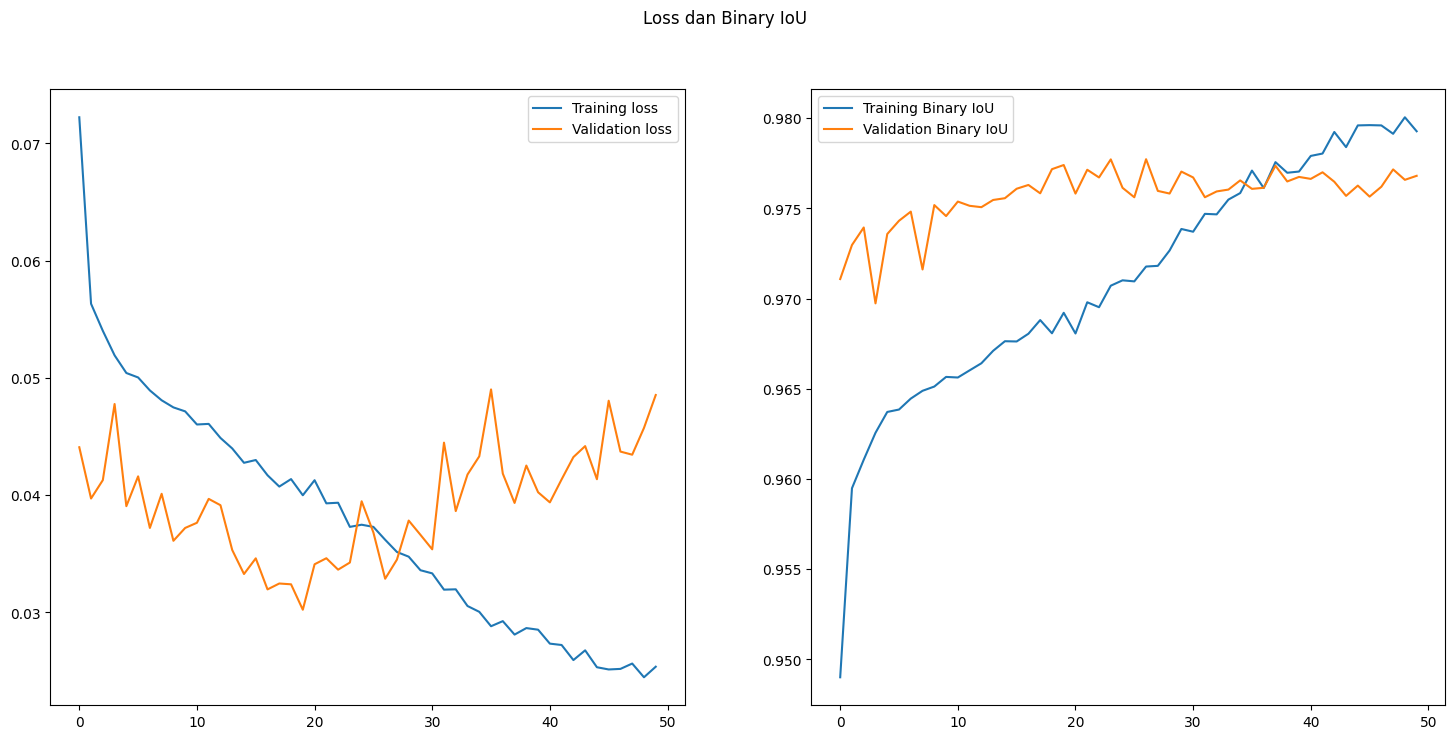

In [ ]:
plt.figure(figsize=(18, 8))
plt.suptitle("Loss dan Binary IoU")

plt.subplot(121)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['binary_io_u'], label='Training Binary IoU')
plt.plot(history.history['val_binary_io_u'], label='Validation Binary IoU')
plt.legend()
plt.show()

In [ ]:
def inference_clothes_mask(model, image) :
    pred = model.predict(image, verbose=0)
    mask = tf.where(pred > 0.5, 1, 0)
    return mask

In [ ]:
model_best = keras.models.load_model('clothes_segmentation.h5')

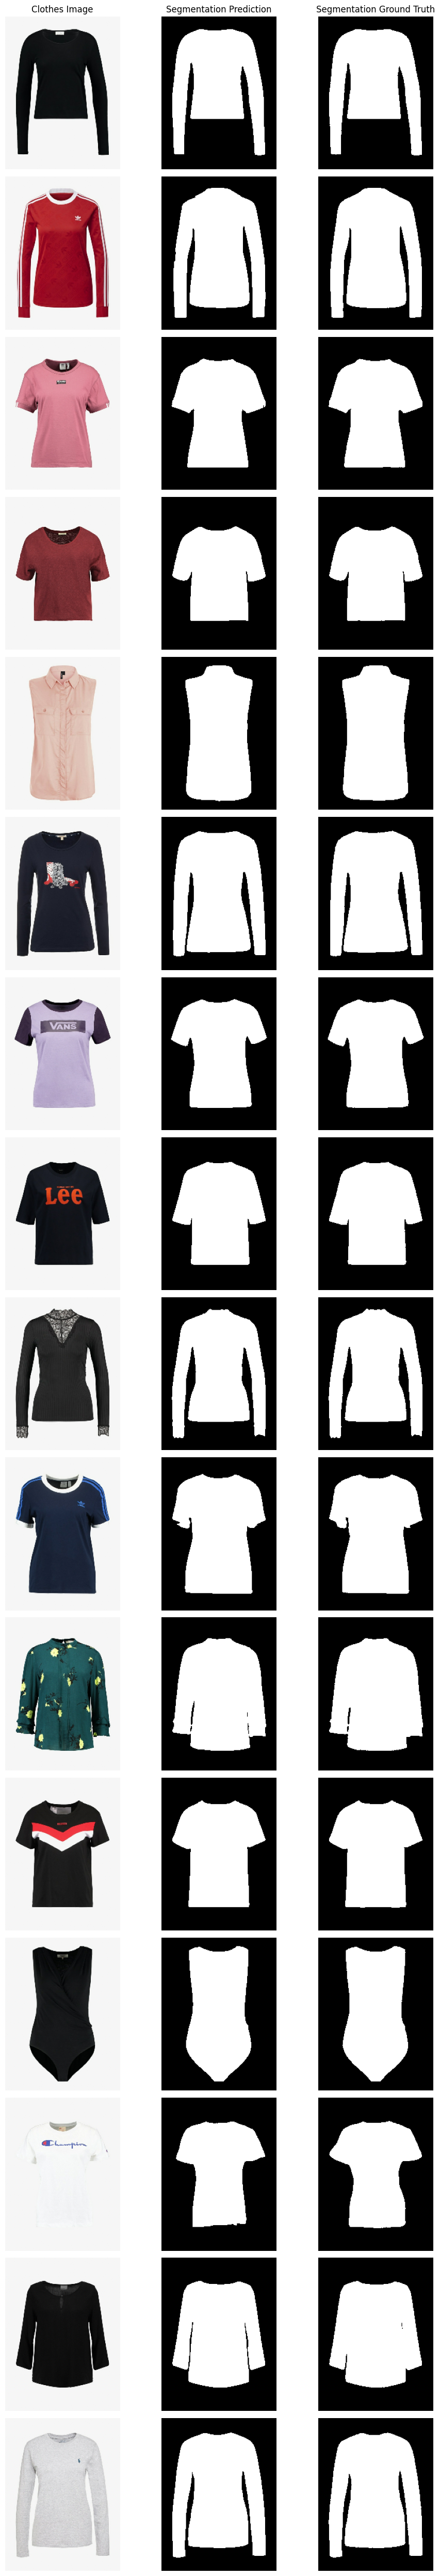

In [ ]:
sample = test_clothes_pairs.take(1).as_numpy_iterator().next()
preds = inference_clothes_mask(model_best, sample[0])
clothes_images = sample[0]
ground_truths = sample[1]

plot_images = [clothes_images, preds, ground_truths]

titles = ["Clothes Image", "Segmentation Prediction", "Segmentation Ground Truth"]

plt.subplots(16, 3, figsize=(10, 50), sharex=True)
for i in range(0, 48, 3) :
    for j in range(1, 4) :

        plt.subplot(16, 3, i+j)
        if j == 1 :
            plt.imshow(plot_images[j-1][i//3])
        else :
            plt.imshow(plot_images[j-1][i//3], cmap='gray')

        if i == 0 :
            plt.title(titles[j-1])
        plt.axis(False)

plt.tight_layout(pad=1)
plt.axis(False)
plt.show()

In [ ]:
model_best.evaluate(test_clothes_pairs)

127/127 [==============================] - 449s 3s/step - loss: 0.0266 - binary_io_u: 0.9824


[0.02661173790693283, 0.9824210405349731]